In [125]:
import pandas as pd
import numpy as np
import math as m
import os
import collections
import csv
import random as rn
import seaborn as sns
import scipy.stats as stats
from itertools import islice
from scipy.stats import beta as beta
import matplotlib.pyplot as plt

# ------------------------------
# ----- PARAMETERS & SETUP -----
# ------------------------------

# Parameter setting

dataset_name = "seed_power_law_1"
authors_number = 20
months_number = 1
readers_classes = 10
papers_classes = 10
shuffling = True
shuffle_number = 100

# Seed folder path

dataset_folder_path = "../data/{}/".format(dataset_name)
dataset_shuffle_folder_path = "../data/{}/shuffle/".format(dataset_name)
dataset_entries_folder_path = "../data/{}/entries/".format(dataset_name)
dataset_plots_folder_path = "../data/{}/plots/".format(dataset_name)
info_file_path = "{}info.csv".format(dataset_entries_folder_path)
ratings_file_path = "{}ratings.csv".format(dataset_entries_folder_path)
authors_file_path = "{}authors.csv".format(dataset_entries_folder_path)
stats_file_path = "{}stats.csv".format(dataset_entries_folder_path)

os.makedirs(dataset_folder_path, exist_ok=True)
os.makedirs(dataset_entries_folder_path, exist_ok=True)
os.makedirs(dataset_plots_folder_path, exist_ok=True)

print("DATASET NAME: ", dataset_name)
print("DATASET FOLDER PATH: ", dataset_folder_path)
print("INFO FILE PATH: ", info_file_path)
print("RATINGS FILE PATH: ", ratings_file_path)
print("AUTHORS FILE PATH: ", authors_file_path)

# Functions

# Return first n items of the iterable as a list
def take(n, iterable):
    return list(islice(iterable, n))

def truncated_power_law(a, m):
    x = np.arange(1, m+1, dtype='float')
    pmf = 1/x**a
    pmf /= pmf.sum()
    return stats.rv_discrete(values=(range(1, m+1), pmf))

# ------------------------------
# ---- CORE IMPLEMENTATION -----
# ------------------------------

DATASET NAME:  seed_power_law_1
DATASET FOLDER PATH:  ../data/seed_power_law_1/
INFO FILE PATH:  ../data/seed_power_law_1/entries/info.csv
RATINGS FILE PATH:  ../data/seed_power_law_1/entries/ratings.csv
AUTHORS FILE PATH:  ../data/seed_power_law_1/entries/authors.csv


---------- INTER-READERS DISTRIBUTION GENERATION STARTED ----------
Generated readers: 55
Distinct readers classes: 10 (i.e., m)
Total amount of ratings to give:  356
Minimum number of papers required: 33
There are 1 readers which give 33 ratings
There are 2 readers which give 15 ratings
There are 3 readers which give 12 ratings
There are 7 readers which give 10 ratings
There are 5 readers which give 8 ratings
There are 4 readers which give 7 ratings
There are 6 readers which give 5 ratings
There are 8 readers which give 4 ratings
There are 10 readers which give 3 ratings
There are 9 readers which give 3 ratings
Etc.
---------- INTER-READERS DISTRIBUTION GENERATION COMPLETED ----------


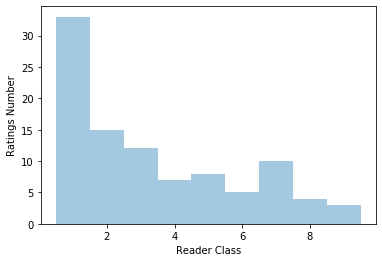

In [126]:
print("---------- INTER-READERS DISTRIBUTION GENERATION STARTED ----------")

a, m = .9, readers_classes
d = truncated_power_law(a=a, m=m)
n = 100
sample_readers = d.rvs(size=n)
ax = sns.distplot(sample_readers, bins=np.arange(m)+0.5, kde=False)
ax.set(xlabel="Reader Class", ylabel= "Ratings Number")
fig = ax.get_figure()
path = "{}/plots/power-law-readers.pdf".format(dataset_folder_path)
fig.savefig(path, bbox_inches='tight')

readers_number = int((m*(m+1))/2)
ratings_number = 0
reader_rating_frequency = list(collections.Counter(sample_readers).most_common())
for readers_amount,rating_frequency in reader_rating_frequency:
    ratings_number += readers_amount * rating_frequency
min_papers_number = collections.Counter(sample_readers).most_common()[0][1]

print(f"Generated readers: {readers_number}")
print(f"Distinct readers classes: {readers_classes} (i.e., m)")
print(f"Total amount of ratings to give:  {ratings_number}")
print(f"Minimum number of papers required: {min_papers_number}")
for readers_amount, rating_frequency in take(10, reader_rating_frequency):
    print(f"There are {readers_amount} readers which give {rating_frequency} ratings")
print("Etc.")

# Setting up arrays

readers = np.arange(readers_number)
authors = np.arange(authors_number)

print("---------- INTER-READERS DISTRIBUTION GENERATION COMPLETED ----------")

---------- INTER-PAPERS DISTRIBUTION GENERATION STARTED ----------
Generated papers: 55
Distinct papers classes: 10 (i.e., m)
Minimum number of readers required: 34
There are 1 papers which receive 34 ratings
There are 2 papers which receive 15 ratings
There are 7 papers which receive 14 ratings
There are 3 papers which receive 8 ratings
There are 6 papers which receive 7 ratings
There are 4 papers which receive 6 ratings
There are 10 papers which receive 5 ratings
There are 5 papers which receive 5 ratings
There are 9 papers which receive 3 ratings
There are 8 papers which receive 3 ratings
Etc.
---------- INTER-PAPERS DISTRIBUTION GENERATION COMPLETED ----------


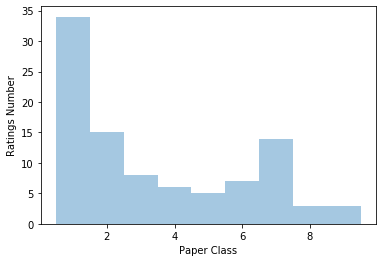

In [127]:
print("---------- INTER-PAPERS DISTRIBUTION GENERATION STARTED ----------")

a, m = .9, papers_classes
d = truncated_power_law(a=a, m=m)
n = 100
sample_papers = d.rvs(size=n)
ax = sns.distplot(sample_papers, bins=np.arange(m)+0.5, kde=False)
ax.set(xlabel="Paper Class", ylabel= "Ratings Number")
fig = ax.get_figure()
path = "{}/plots/power-law-papers.pdf".format(dataset_folder_path)
fig.savefig(path, bbox_inches='tight')

papers_number = int((m*(m+1))/2)
paper_rating_frequency = list(collections.Counter(sample_papers).most_common())
min_readers_number = collections.Counter(sample_papers).most_common()[0][1]

print(f"Generated papers: {papers_number}")
print(f"Distinct papers classes: {papers_classes} (i.e., m)")
print(f"Minimum number of readers required: {min_readers_number}")
for paper_amount, rating_frequency in take(10, paper_rating_frequency):
    print(f"There are {paper_amount} papers which receive {rating_frequency} ratings")
print("Etc.")

# Setting up arrays

papers = np.arange(papers_number)

print("---------- INTER-PAPERS DISTRIBUTION GENERATION COMPLETED ----------")

In [182]:
print("---------- READER-PAPER GRAPH GENERATION STARTED ----------")

inc_matrix = np.zeros_like(np.arange(readers_number * papers_number).reshape(readers_number, papers_number))

paper_mappings = pd.DataFrame(columns=["Paper", "Rating Frequency", "Ratings Received"])
paper_set = set(papers)
print(f"Total Papers: {len(paper_set)}")
for paper_amount, rating_frequency in paper_rating_frequency:
    sample = rn.sample(paper_set, paper_amount)
    for paper_id in sample:
        paper_set.remove(paper_id)
        paper_mappings = paper_mappings.append({"Paper": paper_id, "Rating Frequency": rating_frequency, "Ratings Received": 0}, ignore_index=True)
    print(f"Sampled Papers: {paper_amount} Remaining Papers: {len(paper_set)}")

reader_mappings = pd.DataFrame(columns=["Reader", "Rating Frequency", "Ratings Given"])
reader_set = set(readers)
print(f"Total Readers: {len(reader_set)}")
for reader_amount, rating_frequency in reader_rating_frequency:
    sample = rn.sample(reader_set, reader_amount)
    for reader_id in sample:
        reader_set.remove(reader_id)
        reader_mappings = reader_mappings.append({"Reader": reader_id, "Rating Frequency": rating_frequency, "Ratings Given": 0}, ignore_index=True)
    print(f"Sampled Papers: {reader_amount} Remaining Papers: {len(reader_set)}")

for reader_index, reader_row in reader_mappings.iterrows():
    reader_id = reader_row["Reader"]
    papers_to_sample = reader_row["Rating Frequency"]
    papers_sampled = paper_mappings[:papers_to_sample]
    for paper_index, paper_row in papers_sampled.iterrows():
        paper_id = paper_row["Paper"]
        ratings_expected = paper_row["Rating Frequency"]
        ratings_received = paper_row["Ratings Received"]
        if ratings_received < ratings_expected:
            inc_matrix[reader_id, paper_id] = 1
            inc_matrix[paper_id, reader_id] = 1
            paper_mappings.loc[paper_index, "Ratings Received"] = ratings_received + 1
            if ratings_received == ratings_expected:
                paper_mappings.drop(paper_index, inplace=True)

rp_graph = pd.DataFrame(data=inc_matrix, index=readers,  columns=papers) 
rp_graph_grade_column = rp_graph.sum(axis = 1)
rp_graph_grade_row = rp_graph.sum()
rp_graph_symmetry = (rp_graph.values.transpose() == rp_graph.values).all()
rp_graph_csv_path = "{}incidence_matrix.csv".format(dataset_entries_folder_path)
rp_graph.to_csv(rp_graph_csv_path)
print("Graph (Incidence Matrix) Saved at Path: {}".format(rp_graph_csv_path))
print(f"Graph Symmetry: {rp_graph_symmetry}")

print("---------- READER-PAPER GRAPH GENERATION COMPLETED ----------")

---------- READER-PAPER GRAPH GENERATION STARTED ----------
Total Papers: 55
Sampled Papers: 1 Remaining Papers: 54
Sampled Papers: 2 Remaining Papers: 52
Sampled Papers: 7 Remaining Papers: 45
Sampled Papers: 3 Remaining Papers: 42
Sampled Papers: 6 Remaining Papers: 36
Sampled Papers: 4 Remaining Papers: 32
Sampled Papers: 10 Remaining Papers: 22
Sampled Papers: 5 Remaining Papers: 17
Sampled Papers: 9 Remaining Papers: 8
Sampled Papers: 8 Remaining Papers: 0
Total Readers: 55
Sampled Papers: 1 Remaining Papers: 54
Sampled Papers: 2 Remaining Papers: 52
Sampled Papers: 3 Remaining Papers: 49
Sampled Papers: 7 Remaining Papers: 42
Sampled Papers: 5 Remaining Papers: 37
Sampled Papers: 4 Remaining Papers: 33
Sampled Papers: 6 Remaining Papers: 27
Sampled Papers: 8 Remaining Papers: 19
Sampled Papers: 10 Remaining Papers: 9
Sampled Papers: 9 Remaining Papers: 0
Graph (Incidence Matrix) Saved at Path: ../data/seed_power_law_1/entries/incidence_matrix.csv
Graph Symmetry: True
---------- R

In [3]:
print("---------- INTRA-PAPER DISTRIBUTIONS GENERATION STARTED ----------")

generated_configurations = {"0":{},"1":{},"2":{},"3":{},"4":{}}

beta_distributions_frequencies = [(0, int(round((5*papers_number/100))))]
beta_distributions_frequencies.append((1, int(round(30*papers_number/100))))
beta_distributions_frequencies.append((2, int(round(20*papers_number/100))))
beta_distributions_frequencies.append((3, int(round(30*papers_number/100))))
beta_distributions_frequencies.append((4, int(round(15*papers_number/100))))

papers_set = set(papers)
paper_distributions = [None] * papers_number

generated_papers_distributions = 0
for (index, papers_amount) in beta_distributions_frequencies:
    if papers_amount > len(papers_set):
        papers_amount = len(papers_set)
    current_paper_set = rn.sample(papers_set, papers_amount)
    generated_configurations["{}".format(index)]["papers_ids"] = current_paper_set
    generated_configurations["{}".format(index)]["papers_amount"] = papers_amount
    for paper in current_paper_set:
        a = 0
        b = 0
        if index==0:
            # CASE 1: a == b == 1, 5% of papers
            a = 1
            b = 1
        if index==1:
            # CASE 2: a == b > 1, 30% of papers
            a = rn.randint(2, 10)
            b = a
        if index == 2:
            # CASE 3: 0 < (a ^ b) < 1, 30% of papers
            a = rn.uniform(0.3, 1)
            b = rn.uniform(0.001, 1)
        if index == 3:
            # CASE 4: (a V b) == 1, (a > b V b > a), 20% of papers
            a = 1
            b = rn.randint(1, 10)
            if rn.randint(0,1) > 0.5:
                a, b = b, a
        if index == 4:
            # CASE 5: (a ^ b) > 1, (a > b V b > a), 15% of papers
            a = rn.randint(2, 10)
            b = rn.randint(2 + a, 10 + a)
            if rn.randint(0,1) > 0.5:
                a, b = b, a
        percentage = 100*generated_papers_distributions/papers_number
        if percentage % 10 == 0:
            print("{}/{} ({}/100%)".format(int(generated_papers_distributions), papers_number, int(percentage)))
        paper_distributions[paper] = [a, b]
        generated_papers_distributions = generated_papers_distributions + 1
        papers_set.remove(paper)
print("{}/{} (100/100%)".format(papers_number, papers_number))

print("---------- INTRA-PAPER DISTRIBUTIONS GENERATION COMPLETED ----------")

---------- INTRA-PAPER DISTRIBUTIONS GENERATION STARTED ----------
0/1576 (0/100%)
788/1576 (50/100%)
1576/1576 (100/100%)
---------- INTRA-PAPER DISTRIBUTIONS GENERATION COMPLETED ----------


In [4]:
print("---------- READERS SAMPLING STARTED ----------")

readers_configurations = []
# key: amount of ratings to generate, value: readers identifiers

samples_amount = 0
for readers_amount, rating_frequency in reader_rating_frequency:
    sampled_readers = np.random.choice(readers, readers_amount, False) 
    readers = np.setdiff1d(readers, sampled_readers)
    readers_configurations.append((readers_amount, rating_frequency, sampled_readers))
    percentage = round(100*samples_amount/readers_number)
    samples_amount += readers_amount
    print(f"Sampled Readers: {samples_amount} Remaining Readers: {len(readers)}")

print("---------- READERS SAMPLING COMPLETED ----------")

---------- READERS SAMPLING STARTED ----------
Sampled Readers: 1 Remaining Readers: 464
Sampled Readers: 3 Remaining Readers: 462
Sampled Readers: 6 Remaining Readers: 459
Sampled Readers: 10 Remaining Readers: 455
Sampled Readers: 15 Remaining Readers: 450
Sampled Readers: 21 Remaining Readers: 444
Sampled Readers: 28 Remaining Readers: 437
Sampled Readers: 36 Remaining Readers: 429
Sampled Readers: 45 Remaining Readers: 420
Sampled Readers: 55 Remaining Readers: 410
Sampled Readers: 66 Remaining Readers: 399
Sampled Readers: 78 Remaining Readers: 387
Sampled Readers: 95 Remaining Readers: 370
Sampled Readers: 108 Remaining Readers: 357
Sampled Readers: 124 Remaining Readers: 341
Sampled Readers: 142 Remaining Readers: 323
Sampled Readers: 156 Remaining Readers: 309
Sampled Readers: 176 Remaining Readers: 289
Sampled Readers: 195 Remaining Readers: 270
Sampled Readers: 210 Remaining Readers: 255
Sampled Readers: 233 Remaining Readers: 232
Sampled Readers: 255 Remaining Readers: 210
S

In [5]:
print("---------- RATINGS GENERATION STARTED ----------")

generated_ratings = 0
rated_papers = []
with open(ratings_file_path, mode='w', newline='') as ratings_file:
    ratings_writer = csv.writer(ratings_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    ratings_writer.writerow(['Timestamp', 'Reader', 'Paper', 'Score','Reader-Label'])
    for readers_amount, rating_frequency, sampled_readers in readers_configurations:    
        for reader in sampled_readers:
            sample = np.random.choice(papers, rating_frequency, False)     
            for paper in sample:    
                paper_distribution = beta(paper_distributions[paper][0],paper_distributions[paper][1])
                percentage = 100*generated_ratings/ratings_number
                if percentage % 10 == 0:
                    print("{}/{} ({}/100%)".format(int(generated_ratings), ratings_number, int(percentage)))
                generated_rating = round(paper_distribution.rvs(1)[0], 2)
                if generated_rating == 0:
                    generated_rating = 0.01
                ratings_writer.writerow([
                    generated_ratings, 
                    reader, 
                    paper, 
                    generated_rating,
                    "R#{}".format(reader)
                ])
                rated_papers.append(paper)
                generated_ratings+=1
    
    # Filling gaps
    readers = np.arange(readers_number)
    unrated_papers = set(papers) - set(rated_papers)    
    for paper in unrated_papers:
        for reader in np.random.choice(readers, 5, False):
            paper_distribution = paper_distributions[paper]
            generated_rating = round(paper_distribution.rvs(1)[0], 2)
            if generated_rating == 0:
                generated_rating = 0.01
                ratings_writer.writerow([
                    generated_ratings, 
                    reader, 
                    paper,
                    generated_rating,
                    "R#{}".format(reader)
                ])
                generated_ratings+=1
        
    print("{}/{} (100/100%)".format(ratings_number, ratings_number))
    
ratings_file.close()

paper_ratings = pd.read_csv(ratings_file_path)
paper_ratings = paper_ratings.sample(frac=1)
paper_ratings["Timestamp"] = range(len(paper_ratings))
paper_ratings.reset_index(drop=True, inplace=True)

paper_ratings.to_csv(ratings_file_path, index=False, header=True, sep=",")

print("---------- RATINGS GENERATION ENDED ----------")

---------- RATINGS GENERATION STARTED ----------
0/100418 (0/100%)
50209/100418 (50/100%)
100418/100418 (100/100%)
---------- RATINGS GENERATION ENDED ----------


In [6]:
# Authors file generation

print("---------- AUTHORS GENERATION STARTED ----------")

with open(authors_file_path, mode='w', newline='') as authors_file:
    authors_writer = csv.writer(authors_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    authors_writer.writerow(["Author", "Paper"])
    for index, author in enumerate(authors):
        percentage = 100*index/authors_number
        if percentage % 10 == 0:
            print("{}/{} ({}/100%)".format(int(index), authors_number, int(percentage)))
        # An author writes a number of paper between 1 and paper_fraction
        author_papers_number = rn.randint(1, (papers_number-1))
        papers_written = np.random.choice(papers, author_papers_number).tolist()
        papers_written = set(papers_written)
        if len(papers_written) > 1:
            papers_written = map(str, list(papers_written))
            papers_written = ";".join(papers_written)
        else:
            papers_written = list(papers_written)[0]
        authors_writer.writerow([author, papers_written])
    print("{}/{} (100/100%)".format(authors_number, authors_number))
authors_file.close()
        
print("---------- AUTHORS GENERATION ENDED ----------")

---------- AUTHORS GENERATION STARTED ----------
0/20 (0/100%)
2/20 (10/100%)
4/20 (20/100%)
6/20 (30/100%)
8/20 (40/100%)
10/20 (50/100%)
12/20 (60/100%)
14/20 (70/100%)
16/20 (80/100%)
18/20 (90/100%)
20/20 (100/100%)
---------- AUTHORS GENERATION ENDED ----------


In [7]:
# Info file generation

print("---------- INFO GENERATION STARTED ----------")

info_dataframe = pd.DataFrame(columns=["Dataset", "Paper", "Reader", "Rating", "Author"])
info_dataframe = info_dataframe.append(
    {
        "Dataset": dataset_name, 
        "Paper": papers_number, 
        "Reader": readers_number, 
        "Rating": ratings_number, 
        "Author": authors_number
    }, ignore_index=True)
info_dataframe.to_csv(info_file_path, index=False)

print("---------- INFO GENERATION ENDED ----------")

---------- INFO GENERATION STARTED ----------
---------- INFO GENERATION ENDED ----------


In [8]:
# Stats file generation

print("---------- STATS GENERATION STARTED ----------")

temp_ratings_dataframe = pd.read_csv(ratings_file_path)
temp_ratings_dataframe = temp_ratings_dataframe.loc[:, temp_ratings_dataframe.columns != "Reader-Label"]
temp_ratings_dataframe[temp_ratings_dataframe.columns] = temp_ratings_dataframe[temp_ratings_dataframe.columns].apply(pd.to_numeric)

stats_dataframe = temp_ratings_dataframe.copy()
stats_dataframe[stats_dataframe > 0.0000001] = 1

print("---------- COMPUTING STATS FOR PAPERS ----------")

sums_paper = stats_dataframe.copy().sum(axis=0)
sums_paper_dataframe = pd.DataFrame(sums_paper)

max_ratings_paper = sums_paper_dataframe.max()
min_ratings_paper = sums_paper_dataframe.min()
mean_ratings_paper = sums_paper_dataframe.mean()

temp_ratings_dataframe = temp_ratings_dataframe.T
paper_counter = 0
for index, row in temp_ratings_dataframe.iterrows():
    if len(np.unique(row)) == 1:
        paper_counter+=1
        
print("---------- COMPUTING STATS FOR READERS ----------")

sums_reader = stats_dataframe.copy().sum(axis=1)
counter=collections.Counter(sums_reader)
sums_reader_dataframe = pd.DataFrame(sums_reader)

max_ratings_reader = sums_reader_dataframe.max()
min_ratings_reader = sums_reader_dataframe.min()
mean_ratings_reader = sums_reader_dataframe.mean()

temp_ratings_dataframe = temp_ratings_dataframe
reader_counter = 0
for index, row in temp_ratings_dataframe.iterrows():
    if len(np.unique(row)) == 1:
        reader_counter+=1
        
# Writing stats to file

stats_dataframe = pd.DataFrame(columns=[
    "Dataset",
    "Max Number Rating Paper", 
    "Min Number Rating Paper", 
    "Mean Number Rating Paper",
    "Number Papers Unique Ratings",
    "Max Number Rating Reader", 
    "Min Number Rating Reader", 
    "Mean Number Rating Reader"
    "Number Readers Unique Rating"
])
stats_dataframe = stats_dataframe.append(
    {
        "Dataset": dataset_name, 
        "Max Number Rating Paper": int(max_ratings_paper.values[0]), 
        "Min Number Rating Paper": int(min_ratings_paper.values[0]), 
        "Number Papers Unique Ratings": paper_counter, 
        "Mean Number Rating Paper": int(mean_ratings_paper.values[0]), 
        "Max Number Rating Reader": int(max_ratings_reader.values[0]), 
        "Min Number Rating Reader": int(min_ratings_reader.values[0]), 
        "Mean Number Rating Reader": int(mean_ratings_reader.values[0]), 
        "Number Readers Unique Rating": reader_counter, 
    }, ignore_index=True)
stats_dataframe.to_csv(stats_file_path, index=False)

print("---------- STATS GENERATION COMPLETED ----------")

---------- STATS GENERATION STARTED ----------
---------- COMPUTING STATS FOR PAPERS ----------
---------- COMPUTING STATS FOR READERS ----------
---------- STATS GENERATION COMPLETED ----------


In [ ]:
# Data generation for experiments

# ------------------------------
# -- EXP 1-A: DATA GENERATION --
# ------------------------------

print("---------- SPECIAL RATINGS STARTED ----------")

gaussian_beta_distributions = generated_configurations["2"]
papers_identifiers = gaussian_beta_distributions["papers_ids"]
for paper in papers_identifiers:
    mean = (paper_distributions[paper][0]/(paper_distributions[paper][0] + paper_distributions[paper][1]))
    SR1_rating_id = generated_ratings
    SR1_reader = readers_number
    SR1_paper = paper
    SR1_rating_score = round(mean,2)
    SR1_reader_label = "SR#1"
    SR2_rating_id = generated_ratings+1
    SR2_reader = readers_number+1
    SR2_paper = paper
    SR2_reader_label = "SR#2"
    SR3_rating_id = generated_ratings+2
    SR3_reader = readers_number+2
    SR3_paper = paper
    SR3_reader_label = "SR#3"
    if mean <= 0.5:
        SR2_rating_score = 0.01
        SR3_rating_score = round(((1-mean)/2),2)
    else:
        SR2_rating_score = 1.0
        SR3_rating_score = round((mean/2),2)
    with open(ratings_file_path, mode='a', newline='') as ratings_file:
        ratings_writer = csv.writer(ratings_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        ratings_writer.writerow([SR1_rating_id, SR1_reader, SR1_paper, SR1_rating_score, SR1_reader_label])
        ratings_writer.writerow([SR2_rating_id, SR2_reader, SR2_paper, SR2_rating_score, SR2_reader_label])
        ratings_writer.writerow([SR3_rating_id, SR3_reader, SR3_paper, SR3_rating_score, SR3_reader_label])
    ratings_file.close()
    generated_ratings = generated_ratings + 3
ratings_number = generated_ratings
readers_number = readers_number + 3
    
# Updating info file

info_dataframe = pd.DataFrame(columns=["Dataset", "Paper", "Reader", "Rating", "Author"])
info_dataframe = info_dataframe.append(
    {
        "Dataset": dataset_name, 
        "Paper": papers_number, 
        "Reader": readers_number, 
        "Rating": ratings_number, 
        "Author": authors_number
    }, ignore_index=True)
info_dataframe.to_csv(info_file_path, index=False)

print("---------- SPECIAL RATINGS COMPLETED  ----------")

In [9]:
# ------------------------------
# -- EXP 1-B: DATA GENERATION --
# ------------------------------

print("---------- RATINGS SHUFFLING STARTED ----------")

if shuffling:
    paper_ratings = pd.read_csv(ratings_file_path)
    os.makedirs(dataset_shuffle_folder_path, exist_ok=True)
    for s in range(shuffle_number):
        c = 0
        if s % 10 == 0:
            print("{}/{} ({}/100%)".format(s, shuffle_number, s))
        current_shuffle_file_path = "{}/shuffle_{}.csv".format(dataset_shuffle_folder_path, s)
        shuffled_papers_ratings = paper_ratings.sample(frac=1)
        for i, row in shuffled_papers_ratings.iterrows():
            shuffled_papers_ratings.at[i,'Timestamp'] = c
            c  = c + 1
        shuffled_papers_ratings.to_csv(current_shuffle_file_path, index=False, header=True, sep=",")
    print("{}/{} (100/100%)".format(shuffle_number, shuffle_number))
    
print("---------- RATINGS SHUFFLING COMPLETED ----------")


---------- RATINGS SHUFFLING STARTED ----------
0/100 (0/100%)
10/100 (10/100%)
20/100 (20/100%)
30/100 (30/100%)
40/100 (40/100%)
50/100 (50/100%)
60/100 (60/100%)
70/100 (70/100%)
80/100 (80/100%)
90/100 (90/100%)
100/100 (100/100%)
---------- RATINGS SHUFFLING COMPLETED ----------
